In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

np.random.seed(42)
num_rows = 1000

data = {
    'Energy_Demand': np.random.randint(200, 1000, size=num_rows),
    'Energy_Supply': np.random.randint(100, 1200, size=num_rows),
    'Renewable_Contribution': np.random.uniform(0, 1, size=num_rows),
    'Grid_Load': np.random.randint(50, 100, size=num_rows),
    'Temperature': np.random.uniform(15, 40, size=num_rows),
    'Voltage_Level': np.random.uniform(220, 250, size=num_rows),
}

data['Efficiency_Score'] = (
    100 - (abs(data['Energy_Supply'] - data['Energy_Demand']) / data['Energy_Demand']) * 100
) * data['Renewable_Contribution'] * (100 - data['Grid_Load']) / 100

df = pd.DataFrame(data)
df

,Energy_Demand,Energy_Supply,Renewable_Contribution,Grid_Load,Temperature,Voltage_Level,Efficiency_Score
0,302,225,0.717598,77,37.271388,241.906652,12.296584
1,635,911,0.692436,95,21.038421,230.944674,1.957359
2,470,636,0.991256,73,23.856783,239.228966,17.311126
3,306,244,0.128394,64,17.633637,233.985448,3.685671
4,271,124,0.104110,71,20.559033,225.698084,1.381470
...,...,...,...,...,...,...,...
995,913,540,0.585865,82,22.694273,228.997882,6.237246
996,238,1020,0.624784,79,30.340948,234.229260,-29.989625
997,472,869,0.071776,66,37.448382,225.040602,0.387772
998,430,362,0.682617,92,35.248111,230.643919,4.597348


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [7]:
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

c:\Users\91944\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\91944\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\91944\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\91944\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [8]:
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {best_k}")

Optimal number of clusters: 7


c:\Users\91944\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\91944\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


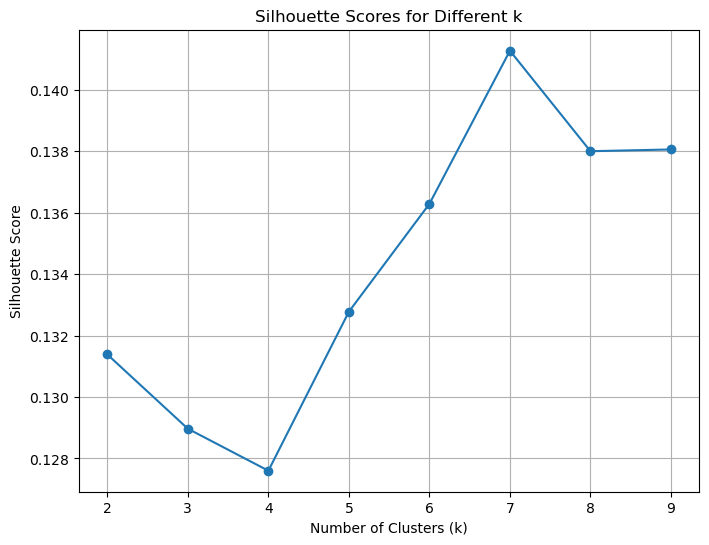

In [9]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [10]:
print("Clustered Data Sample:")
print(df.head())

Clustered Data Sample:
   Energy_Demand  Energy_Supply  Renewable_Contribution  Grid_Load  \
0            302            225                0.717598         77   
1            635            911                0.692436         95   
2            470            636                0.991256         73   
3            306            244                0.128394         64   
4            271            124                0.104110         71   

   Temperature  Voltage_Level  Efficiency_Score  Cluster  
0    37.271388     241.906652         12.296584        4  
1    21.038421     230.944674          1.957359        5  
2    23.856783     239.228966         17.311126        0  
3    17.633637     233.985448          3.685671        4  
4    20.559033     225.698084          1.381470        4  
